In [1]:
import numpy as np
import qiskit_experiments.library.randomized_benchmarking as rb
from qiskit import transpile
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
import qiskit.circuit.library as circuits

# For simulation
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeParis

In [2]:
noise_model = NoiseModel.from_backend(FakeParis(), thermal_relaxation=True, gate_error=True, readout_error=False)
backend = AerSimulator.from_backend(FakeParis(), noise_model=noise_model)

# 1-qubit RB and LRB Experiment

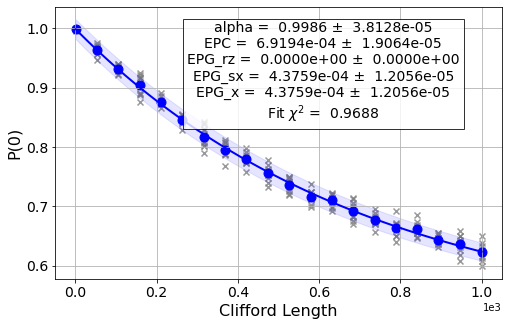

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5011634  0.99861612 0.49795468] ± [8.32740665e-03 3.81283461e-05 8.38750287e-03]
- χ²: 0.9688359296686566
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.998616120849531 ± 3.812834613051487e-05
- χ²: 0.9688359296686566
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0006919395752345014 ± 1.9064173065257437e-05
- χ²: 0.9688359296686566
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0 ± 0.0
- χ²: 0.9688359296686566
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.00043758523072078915 ± 1.2056255875282924e-05
- χ²: 0.9688359296686566
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.00043758523072078915 ± 1.2056255875282924e-05
- χ²: 0.9688359296686566
- device_components: ['Q0']
- verified: False


In [3]:
lengths = np.linspace(1, 1000, 20, dtype=int)
num_samples = 10
seed = None
qubits = [0]

rb1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = rb1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

display(expdata1.figure(0))
for result in results1:
    print(result)

In [7]:
exp = StandardRB(qubits=[0], lengths=[4], num_samples=1, seed=seed)
c = exp.circuits()[0]

In [8]:
basis_gates = backend.configuration().basis_gates
print(transpile(c, basis_gates=basis_gates))

global phase: π
         ░ ┌─────────┐┌────┐┌────────┐ ░ ┌────────┐┌────┐┌─────────┐ ░ »
     q: ─░─┤ Rz(π/2) ├┤ √X ├┤ Rz(-π) ├─░─┤ Rz(-π) ├┤ √X ├┤ Rz(π/2) ├─░─»
         ░ └─────────┘└────┘└────────┘ ░ └────────┘└────┘└─────────┘ ░ »
meas: 1/═══════════════════════════════════════════════════════════════»
                                                                       »
«        ┌──────────┐┌────┐┌──────────┐ ░ ┌────┐┌─────────┐ ░ ┌────┐┌────────┐»
«     q: ┤ Rz(-π/2) ├┤ √X ├┤ Rz(-π/2) ├─░─┤ √X ├┤ Rz(π/2) ├─░─┤ √X ├┤ Rz(-π) ├»
«        └──────────┘└────┘└──────────┘ ░ └────┘└─────────┘ ░ └────┘└────────┘»
«meas: 1/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«         ░  ░ ┌─┐
«     q: ─░──░─┤M├
«         ░  ░ └╥┘
«meas: 1/═══════╩═
«               0 
